In [1]:
!date

Tue Dec 27 22:16:40 PST 2022


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt

import scvi

import warnings
warnings.filterwarnings('ignore')


/c4/home/derek/miniconda3/envs/SCVI/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352616446/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Global seed set to 0


In [4]:
# import sys
# !conda install --yes --prefix {sys.prefix} scanpy 

In [5]:
#GW16_1
input_dir='/home/derek/analysis_2/SLR_temp/GW16_1/merged/StarOut/Solo.out/GeneFull/raw/'
adata_16_1=sc.read_mtx(input_dir+'matrix.mtx').T
adata_16_1.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_16_1.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [6]:
#GW16_2
input_dir='/home/derek/analysis_2/SLR_temp/GW16_2/merged/StarOut/Solo.out/GeneFull/raw/'
adata_16_2=sc.read_mtx(input_dir+'matrix.mtx').T
adata_16_2.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_16_2.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [7]:
#GW17_1
input_dir='/home/derek/analysis_2/SLR_temp/GW17_1/merged/StarOut/Solo.out/GeneFull/raw/'
adata_17_1=sc.read_mtx(input_dir+'matrix.mtx').T
adata_17_1.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_17_1.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [ ]:
#GW21_1
input_dir='/home/derek/analysis_7/SLR/data/aggregate_data/new_aggragate/fastqs/merged/StarOut/Solo.out/GeneFull/raw/'
adata_21_1=sc.read_mtx(input_dir+'matrix.mtx').T
adata_21_1.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_21_1.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [ ]:
#GW21_2
input_dir='/home/derek/analysis_2/SLR_temp/GW21_2/merged/StarOut/Solo.out/GeneFull/raw/'
adata_21_2=sc.read_mtx(input_dir+'matrix.mtx').T
adata_21_2.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_21_2.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [ ]:
#GW23_1
input_dir='/home/derek/analysis_2/SLR_temp/GW23_1/merged/StarOut/Solo.out/GeneFull/raw/'
adata_23_1=sc.read_mtx(input_dir+'matrix.mtx').T
adata_23_1.obs_names = pd.read_csv(input_dir+'barcodes.tsv',header=None)[0]
adata_23_1.var_names = pd.read_csv(input_dir+'features.tsv',header=None,sep='\t')[1]

In [ ]:
adata_16_1.var_names_make_unique()
adata_16_2.var_names_make_unique()
adata_17_1.var_names_make_unique()
adata_21_1.var_names_make_unique()
adata_21_2.var_names_make_unique()
adata_23_1.var_names_make_unique()

In [ ]:
sc.pp.filter_cells(adata_16_1,min_counts=200)
sc.pp.filter_cells(adata_16_2,min_counts=200)
sc.pp.filter_cells(adata_17_1,min_counts=200)
sc.pp.filter_cells(adata_21_1,min_counts=200)
sc.pp.filter_cells(adata_21_2,min_counts=200)
sc.pp.filter_cells(adata_23_1,min_counts=200)

In [ ]:
adata_16_1

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

for ad, ax in zip([adata_16_1,adata_16_2,adata_17_1,adata_21_1,adata_21_2,adata_23_1],axes.ravel()):
    ad = ad[ad.obs["n_counts"] >= 1000]
    sns.histplot(ad.obs["n_counts"],ax=ax, bins=100,kde=False,log_scale =True)


fig.subplots_adjust(wspace=0.5)





In [ ]:
sc.pp.filter_cells(adata_16_1,min_counts=1000)
sc.pp.filter_cells(adata_16_2,min_counts=2000)
sc.pp.filter_cells(adata_17_1,min_counts=6000)
sc.pp.filter_cells(adata_21_1,min_counts=1000)
sc.pp.filter_cells(adata_21_2,min_counts=1000)
sc.pp.filter_cells(adata_23_1,min_counts=2000)

In [ ]:
adata  = adata_16_1.concatenate([adata_16_2, adata_17_1, adata_21_1, adata_21_2, adata_23_1])

In [ ]:
adata.var["mito"] = adata.var_names.str.startswith("MT-")

In [ ]:
sc.pp.calculate_qc_metrics(adata,inplace=True,qc_vars=["mito"])

In [ ]:
del adata.obs['pct_counts_in_top_50_genes']
del adata.obs['pct_counts_in_top_100_genes']
del adata.obs['pct_counts_in_top_200_genes']
del adata.obs['pct_counts_in_top_500_genes']
del adata.obs['total_counts_mito']
del adata.obs['log1p_total_counts_mito']
#del adata.obs['n_genes']

In [ ]:
#sc.experimental.pp.recipe_pearson_residuals(adata,batch_key='batch')

In [ ]:
adata.raw = adata.copy()

sc.pp.filter_genes(adata, min_counts=3)

adata.layers["counts"] = adata.X.copy()


sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
# adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True
)

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

In [ ]:
#vae = scvi.model.SCVI(adata)

vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")


In [ ]:
vae.train()

In [ ]:
# solo_batch_GW16_1 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW16_1")
# solo_batch_GW16_2 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW16_2")
# solo_batch_GW17 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW17")
# solo_batch_GW21_1 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW21_1")
# solo_batch_GW21_2 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW21_2")
# solo_batch_GW23 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch="GW23")

# solo_batch_GW16_1 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='0')
# solo_batch_GW16_2 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='1')
# solo_batch_GW17 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='2')
# solo_batch_GW21_1 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='3')
# solo_batch_GW21_2 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='4')
# solo_batch_GW23 = scvi.external.SOLO.from_scvi_model(vae, restrict_to_batch='5')

In [ ]:
# solo_batch_GW16_1.train()
# solo_batch_GW16_2.train()
# solo_batch_GW17.train()
# solo_batch_GW21_1.train()
# solo_batch_GW21_2.train()
# solo_batch_GW23.train()

In [ ]:
# solo_batch_GW16_1.predict(soft=False).value_counts()
# solo_batch_GW16_2.predict(soft=False).value_counts()
# solo_batch_GW17.predict(soft=False).value_counts()
# solo_batch_GW21_1.predict(soft=False).value_counts()
# solo_batch_GW21_2.predict(soft=False).value_counts()
# solo_batch_GW23.predict(soft=False).value_counts()

In [ ]:
# predictions = pd.concat([solo_batch_GW16_1.predict(soft=True),
#            solo_batch_GW16_2.predict(soft=True),
#            solo_batch_GW17.predict(soft=True),
#            solo_batch_GW21_1.predict(soft=True),
#            solo_batch_GW21_2.predict(soft=True),
#            solo_batch_GW23.predict(soft=True),
#           ])

# predictions.index = predictions.index.str[:-2]
# adata.obs['soft_singlet'] = predictions['singlet']
# adata.obs['soft_doublet'] = predictions['doublet']

In [ ]:
# predictions = pd.concat([solo_batch_GW16_1.predict(soft=False),
#            solo_batch_GW16_2.predict(soft=False),
#            solo_batch_GW17.predict(soft=False),
#            solo_batch_GW21_1.predict(soft=False),         
#            solo_batch_GW21_2.predict(soft=False),
#            solo_batch_GW23.predict(soft=False),
#           ])

# predictions.index = predictions.index.str[:-2]
# adata.obs['doublet_prediction'] = predictions

In [ ]:
adata

In [ ]:
# adata.raw=adata.copy()
# sc.pp.recipe_zheng17(adata)

# sc.tl.pca(adata)
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)

In [ ]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [ ]:
#adata=adata.raw.copy()

In [ ]:
#adata_ = adata[adata.obs['doublet_prediction'] == 'singlet']

In [ ]:
sc.pp.neighbors(adata,
                use_rep="X_scVI",
               # n_pcs=30,
               # n_neighbors=15
               )

In [ ]:
# sc.experimental.pp.recipe_pearson_residuals(adata)
# sc.pp.neighbors(adata)
sc.tl.umap(adata,
           # n_components=2,     
           # min_dist =.3,
           # spread =2
          )

In [ ]:
sc.tl.leiden(adata,resolution=1.5)

In [ ]:
plt.rcParams['figure.figsize']=10,10

sc.pl.umap(adata,color=['batch','leiden',
                        #  'EOMES','NEUROG2','NEUROD2','SATB2',
                        #   'DLX2','LHX6','SP8',
                        # 'PAX6','ETV1','AIF1',
                        #   'ROBO2','RARB','OLIG1','FOXP1'
                       ],
          # vmax='p99',
           size=30,
           ncols=2,
           palette='Spectral_r'
           # groups=['GW16_1',
           #        # 'GW16_2'
           #       ]
          )

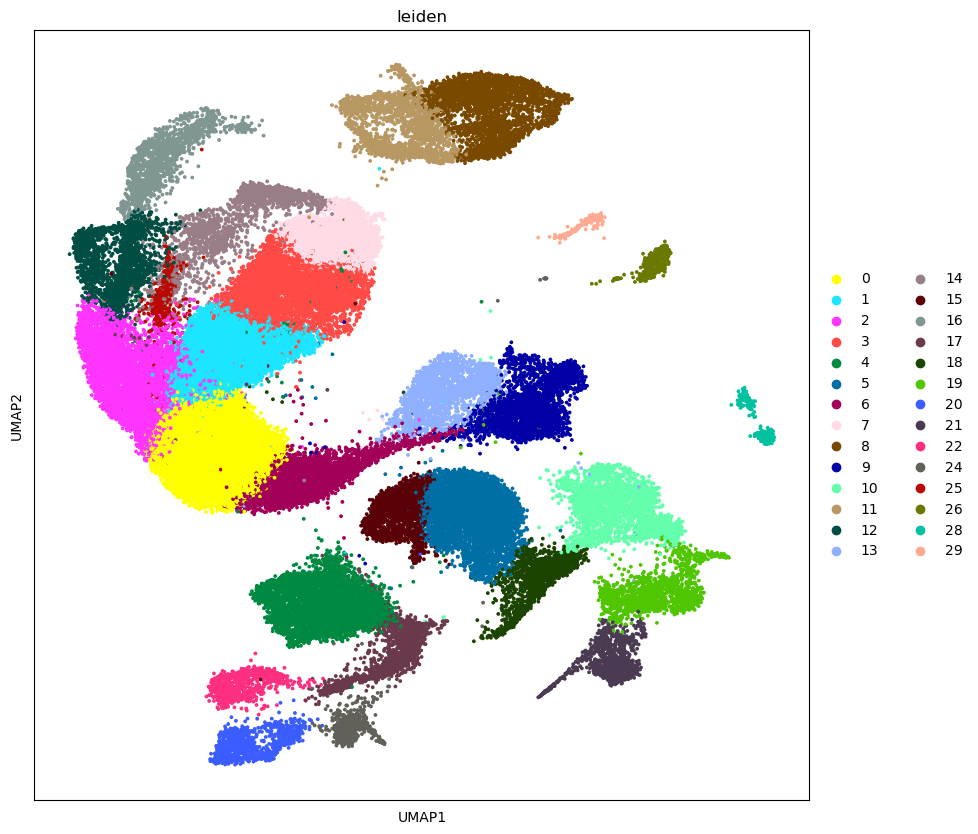

In [53]:
      
sc.pl.umap(adata[~adata.obs.leiden.isin(['23','27','30'])],
           color=['leiden'],
           size=30,
           ncols=2,
           palette=sc.pl.palettes.default_102, #'Spectral_r'
            # groups=['25'
            #       ]
          )

In [60]:
adata_ = adata[~adata.obs.leiden.isin(['23','27','30'])]

In [61]:
adata_.write_h5ad('SCVI_clean.h5ad')

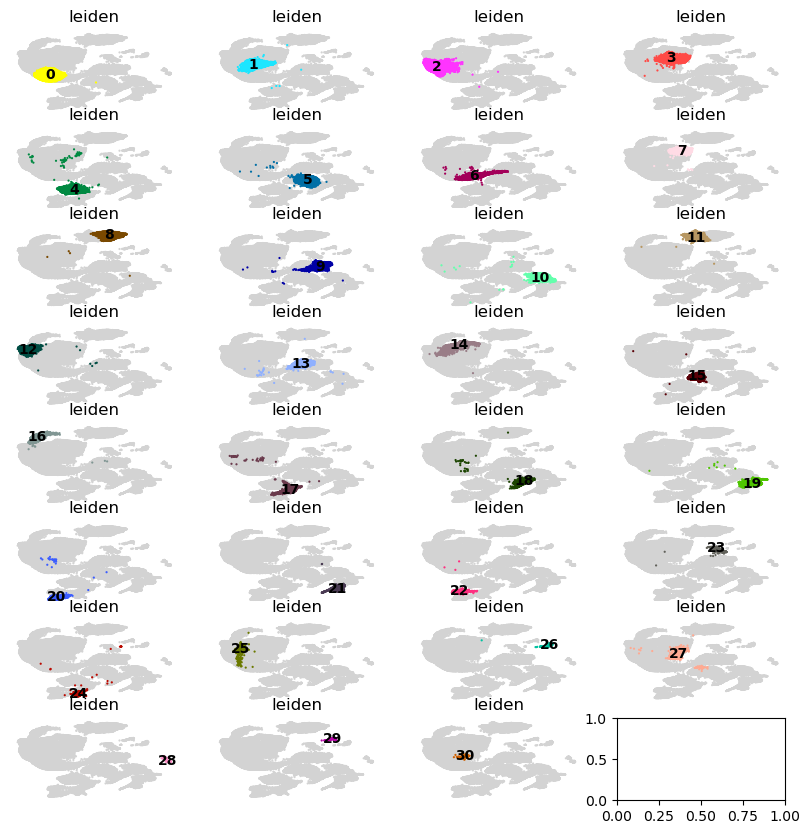

In [84]:
fig, axs = plt.subplots(nrows=8, ncols=4)

#plt.subplots_adjust(wspace=1,hspace=.5)

for i, ax in zip(adata.obs.leiden.cat.categories.tolist(), axs.ravel()):
    sc.pl.umap(adata,color=['leiden'],
           vmax='p99',
           size=10,
           ncols=1,
           groups=[i],
           ax=ax,
           show=False,
           na_in_legend=False,
           legend_loc='on data',
           frameon=False
          )

plt.show()

In [243]:
##write out barcode lists

# pd.DataFrame(adata[adata.obs.batch == 'GW16_1'].obs_names.str[:-7]).to_csv('GW16_1_barcodes.csv',header=None,index=None)
# pd.DataFrame(adata[adata.obs.batch == 'GW16_2'].obs_names.str[:-7]).to_csv('GW16_2_barcodes.csv',header=None,index=None)
# pd.DataFrame(adata[adata.obs.batch == 'GW17'].obs_names.str[:-5]).to_csv('GW17_1_barcodes.csv',header=None,index=None)
# pd.DataFrame(adata[adata.obs.batch == 'GW21_1'].obs_names.str[:-7]).to_csv('GW21_1_barcodes.csv',header=None,index=None)
# pd.DataFrame(adata[adata.obs.batch == 'GW21_2'].obs_names.str[:-7]).to_csv('GW21_2_barcodes.csv',header=None,index=None)
# pd.DataFrame(adata[adata.obs.batch == 'GW23'].obs_names.str[:-5]).to_csv('GW23_1_barcodes.csv',header=None,index=None)

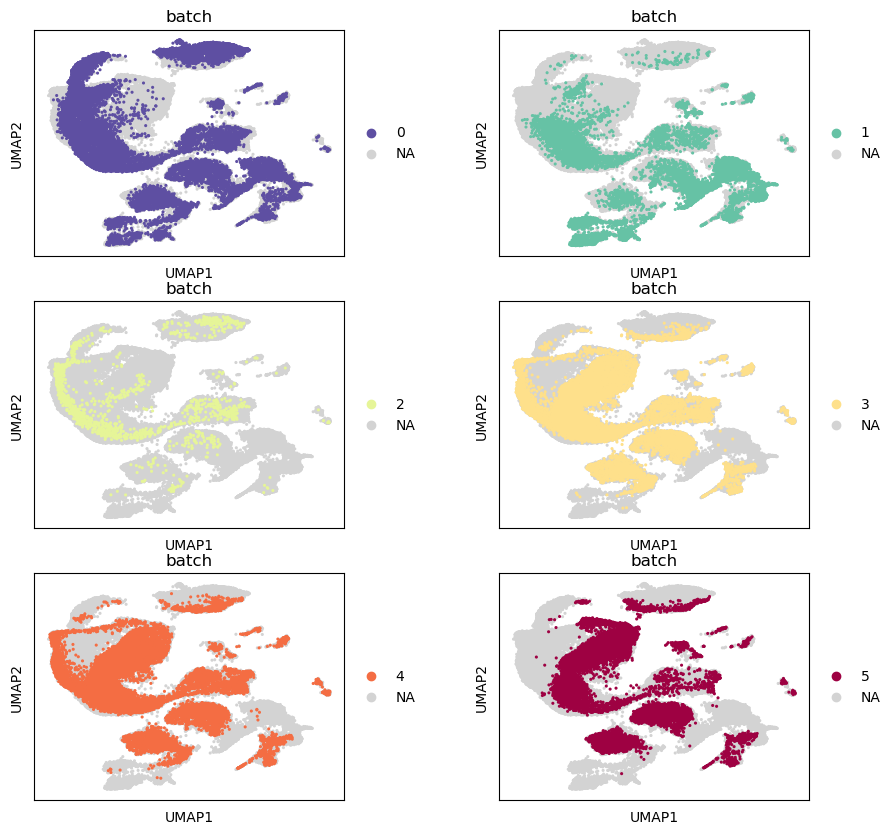

In [112]:
fig, axs = plt.subplots(nrows=3, ncols=2)

plt.subplots_adjust(wspace=0.5)

for i, ax in zip(adata.obs.batch.cat.categories.tolist(), axs.ravel()):
    sc.pl.umap(adata,color=['batch'],
           vmax='p99',
           size=20,
           ncols=1,
           groups=[i],
           ax=ax,
           show=False
          )
    
plt.show()


In [114]:
batch_dict = {'-0':'-GW16_1',
              '-1':'-GW16_2',
              '-2':'-GW17_1',
              '-3':'-GW21_1',
              '-4':'-GW21_2',
              '-5':'-GW23_1'
             }
    

In [115]:
new_names = adata.obs_names.copy()

for key, value in batch_dict.items():
    new_names = new_names.str.replace(key, value)

In [116]:
adata.obs['alt_obs_names'] = new_names

In [118]:
#adata=sc.read_h5ad('SCVI.h5ad')

In [120]:
adata.obs

,n_counts,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_mito,_scvi_batch,_scvi_labels,leiden,alt_obs_names
AAACCCAAGAACCGCA-0,5027.0,0,2618,7.870548,5027.0,8.522778,4.356475,0,0,0,AAACCCAAGAACCGCA-GW16_1
AAACCCAAGCAACAGC-0,6498.0,0,2982,8.000685,6498.0,8.779404,3.985842,0,0,11,AAACCCAAGCAACAGC-GW16_1
AAACCCAAGCCTGGAA-0,4639.0,0,2487,7.819234,4639.0,8.442470,1.832291,0,0,3,AAACCCAAGCCTGGAA-GW16_1
AAACCCACAAACCACT-0,1972.0,0,1319,7.185387,1972.0,7.587310,1.926978,0,0,0,AAACCCACAAACCACT-GW16_1
AAACCCACACCAGCCA-0,6391.0,0,3199,8.070906,6391.0,8.762802,5.711156,0,0,7,AAACCCACACCAGCCA-GW16_1
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCGTAGTA-5,2241.0,5,1434,7.268920,2241.0,7.715124,2.052655,5,0,3,TTTGTTGTCCGTAGTA-GW23_1
TTTGTTGTCCTGTTGC-5,6845.0,5,2967,7.995644,6845.0,8.831420,7.363039,5,0,1,TTTGTTGTCCTGTTGC-GW23_1
TTTGTTGTCTCAAAGC-5,5440.0,5,2678,7.893199,5440.0,8.601718,2.702206,5,0,1,TTTGTTGTCTCAAAGC-GW23_1
TTTGTTGTCTGTAAGC-5,9132.0,5,3735,8.225771,9132.0,9.119650,5.256242,5,0,4,TTTGTTGTCTGTAAGC-GW23_1


In [39]:
adata.obs['scANVI_simple'] = pd.read_csv('./scANVI_annotations.csv',index_col=0)

In [41]:
#adata.obs['age'] = adata.obs['alt_obs_names'].str[-6:].str[:-2].astype('category') 

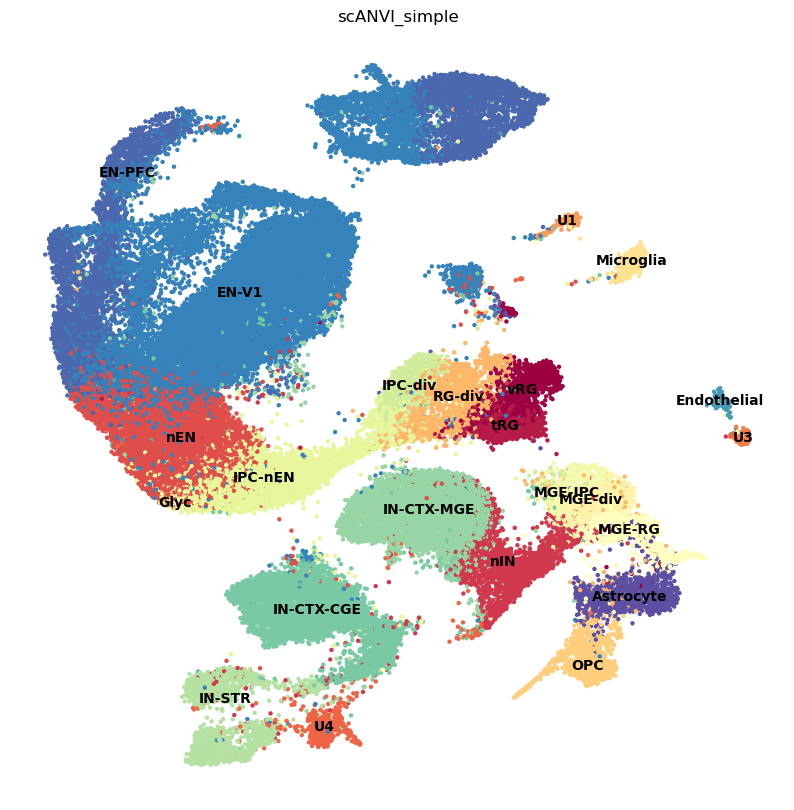

In [44]:
plt.rcParams['figure.figsize']=10,10

sc.pl.umap(adata,color=['scANVI_simple',
                        # 'leiden',
                        # 'age'
                       ],
           vmax='p99',
           size=40,
           ncols=4,
           palette='Spectral_r',
           legend_loc='on data',
           frameon=False,
          )

In [42]:
adata.write_h5ad('SCVI.h5ad')

In [137]:
df = adata.obs.groupby('scANVI_simple')['age'].value_counts(normalize=True)

df = pd.DataFrame(df).unstack()  

df.columns = df.columns.droplevel(0)

colormap = dict(zip(adata.obs['age'].cat.categories.tolist(),adata.uns['age_colors']))

<AxesSubplot: xlabel='scANVI_simple'>

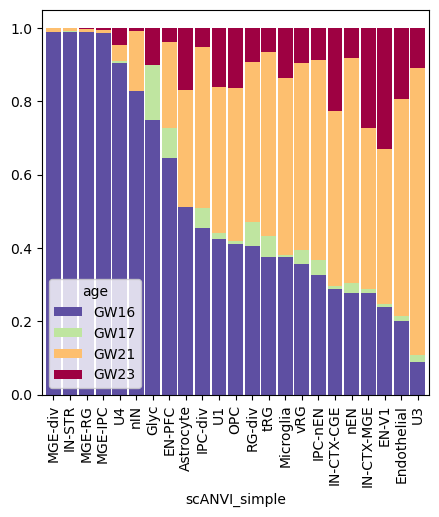

In [139]:
plt.rcParams["figure.figsize"] = 5,5

df.sort_values(by='GW16',ascending=False).plot.bar(stacked=True,color=colormap,width=.9)

In [141]:
#adata.write_h5ad('SCVI_.h5ad')

In [157]:
colors = pd.DataFrame(zip(adata.obs['scANVI_simple'].cat.categories,adata.uns['scANVI_simple_colors']),
                      columns=['celltype','color'])

In [159]:
colors.to_csv('celltpye_colors.csv')

In [140]:
!conda list

# packages in environment at /home/derek/miniconda3/envs/SCVI_2:
#
# Name                    Version                   Build  Channel
_ipython_minor_entry_point 8.7.0                h8cf3c4a_0    conda-forge
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
absl-py                   1.2.0                    pypi_0    pypi
aiohttp                   3.8.1                    pypi_0    pypi
aiosignal                 1.2.0                    pypi_0    pypi
altair                    4.2.0              pyhd8ed1ab_1    conda-forge
anndata                   0.8.0              pyhd8ed1ab_1    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
aom                       3.5.0                h27087fc_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py39hb9d737c_3    conda-forge
asttokens 